In [1]:
# Toggles/Switches
feature_scaling = True
normalization = False

In [2]:
# Imports
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import itertools
import random

In [3]:
# Load Data
(x_train, y_train), \
  (x_test, y_test) = \
  tf.keras.datasets.mnist.load_data()

# Check data shapes
print("train features shape: ", x_train.shape)
print("train labels shape: ", y_train.shape)
print("test set size: ", len(x_test))
print("Min-max values of single pixel: ", (x_train.min(), x_test.max()))


# Print first training example
print(x_train[0][5]) # print a row in image

#? What can we infer from checking the data?
#* Image greyscaling ranges from 0 - 255
#* Image size is 28 * 28 pixels
#* Training set is 60,000 images
#* Testing set is 10,000 images

train features shape:  (60000, 28, 28)
train labels shape:  (60000,)
test set size:  10000
Min-max values of single pixel:  (0, 255)
[  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
 175  26 166 255 247 127   0   0   0   0]


In [4]:
# Feature Scaling
if feature_scaling:
  x_train, x_test = \
    x_train / x_train.max(), \
    x_test / x_test.max()

# Normalization
if normalization:
  x_train, x_test = \
    (x_train - x_train.mean()) / (x_train.max() - x_train.min()), \
    (x_test - x_test.mean()) / (x_test.max() - x_test.min())

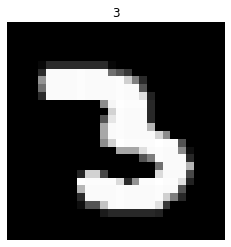

In [5]:
# Visualize Data
index = random.randrange(0, len(x_train))

plt.figure(1)
plt.title(y_train[index])
plt.imshow(x_train[index])
plt.gray()
plt.axis('off')
plt.show()

In [6]:
# TensorFlow model 1
#  2 hidden layered neural neural network with 4 neurons each
#  No activation function

# Set rand seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  # Flattening the data turns it into a 1D array
  #   Takes the current shape and stacks it (multiply shape)
  #   From (28, 28) -> (, 784)
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4),
  tf.keras.layers.Dense(4),
  tf.keras.layers.Dense(10)
])

# Compile model
model_1.compile(
  # CategoricalCrossentropy must receive one-hot encoded data
  # Hence shape error
  # So instead we'll use SparseCategoricalCrossentropy() which can take in integers
  loss=tf.keras.losses.CategoricalCrossentropy(),
  optimizer=tf.keras.optimizers.Adam(),
  metrics=["accuracy"]
)

# Fit model
history_1 = model_1.fit(
  x_train,
  tf.one_hot(y_train, depth=10),
  epochs=10,
  validation_data=(x_test, tf.one_hot(y_test, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 9.1650 - accuracy: 0.0979 - val_loss: 9.8562 - val_accuracy: 0.1023
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 9.8409 - accuracy: 0.1034 - val_loss: 9.8562 - val_accuracy: 0.1023
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 9.8409 - accuracy: 0.1034 - val_loss: 9.8562 - val_accuracy: 0.1023
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 9.8409 - accuracy: 0.1034 - val_loss: 9.8562 - val_accuracy: 0.1023
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 9.8409 - accuracy: 0.1034 - val_loss: 9.8562 - val_accuracy: 0.1023
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 9.8409 - accuracy: 0.1034 - val_loss: 9.8562 - val_accuracy: 0.1023
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 9.8409 - accuracy: 0.1034 - val_loss: 9.8562 - val_accuracy:

In [7]:
# TensorFlow solution 2
# Change: activation function

# Create the model
model_2 = tf.keras.Sequential([
    # Flattening our data turns it into a 1D array
    #   Takes the current shape and stacks it (multiply shape)
    #   In this case (28,28) -> (, 784)
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile model
model_2.compile(
    # CategoricalCrossentropy must receive one-hot encoded data
    # Hence shape error
    # So instead we'll use SparseCategoricalCrossentropy() which can take in integers
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit model
history_2 = model_2.fit(
    x_train,
    tf.one_hot(y_train, depth=10),
    epochs=10,
    validation_data=(x_test, tf.one_hot(y_test, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3050 - accuracy: 0.5559 - val_loss: 0.8816 - val_accuracy: 0.7248
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7364 - accuracy: 0.7903 - val_loss: 0.6102 - val_accuracy: 0.8341
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5954 - accuracy: 0.8340 - val_loss: 0.5613 - val_accuracy: 0.8489
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5537 - accuracy: 0.8454 - val_loss: 0.5584 - val_accuracy: 0.8492
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5338 - accuracy: 0.8496 - val_loss: 0.5211 - val_accuracy: 0.8594
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5213 - accuracy: 0.8534 - val_loss: 0.5114 - val_accuracy: 0.8603
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5110 - accuracy: 0.8558 - val_loss: 0.5146 - val_accuracy:

In [8]:
# TensorFlow solution 3

# set rand seed
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_3.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit model
history_3 = model_3.fit(
    x_train,
    tf.one_hot(y_train, depth=10),
    epochs=10,
    validation_data=(x_test, tf.one_hot(y_test, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7369 - accuracy: 0.7793 - val_loss: 0.4300 - val_accuracy: 0.8767
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4135 - accuracy: 0.8814 - val_loss: 0.3904 - val_accuracy: 0.8889
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3806 - accuracy: 0.8917 - val_loss: 0.3658 - val_accuracy: 0.8970
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3619 - accuracy: 0.8966 - val_loss: 0.3583 - val_accuracy: 0.9001
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3498 - accuracy: 0.8997 - val_loss: 0.3532 - val_accuracy: 0.9011
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3413 - accuracy: 0.9022 - val_loss: 0.3392 - val_accuracy: 0.9051
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3330 - accuracy: 0.9051 - val_loss: 0.3479 - val_accuracy:

In [9]:
# TensorFlow solution 4

# set rand seed
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_4.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit model
history_4 = model_4.fit(
    x_train,
    tf.one_hot(y_train, depth=10),
    epochs=10,
    validation_data=(x_test, tf.one_hot(y_test, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5723 - accuracy: 0.8271 - val_loss: 0.3173 - val_accuracy: 0.9049
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2957 - accuracy: 0.9148 - val_loss: 0.2733 - val_accuracy: 0.9219
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2634 - accuracy: 0.9251 - val_loss: 0.2522 - val_accuracy: 0.9268
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2455 - accuracy: 0.9297 - val_loss: 0.2492 - val_accuracy: 0.9276
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2339 - accuracy: 0.9335 - val_loss: 0.2494 - val_accuracy: 0.9301
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2245 - accuracy: 0.9357 - val_loss: 0.2306 - val_accuracy: 0.9334
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2169 - accuracy: 0.9377 - val_loss: 0.2325 - val_accuracy:

In [10]:
# TensorFlow solution 5

# set rand seed
tf.random.set_seed(42)

# Create model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_5.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit model
history_5 = model_5.fit(
    x_train,
    tf.one_hot(y_train, depth=10),
    epochs=10,
    validation_data=(x_test, tf.one_hot(y_test, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2464 - accuracy: 0.9283 - val_loss: 0.1362 - val_accuracy: 0.9582
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1062 - accuracy: 0.9680 - val_loss: 0.1193 - val_accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0763 - accuracy: 0.9760 - val_loss: 0.0706 - val_accuracy: 0.9778
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0562 - accuracy: 0.9824 - val_loss: 0.0813 - val_accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0439 - accuracy: 0.9857 - val_loss: 0.0872 - val_accuracy: 0.9722
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0365 - accuracy: 0.9880 - val_loss: 0.0775 - val_accuracy: 0.9788
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0305 - accuracy: 0.9897 - val_loss: 0.0813 - val_accuracy:

In [11]:
def plot_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
    # Create the confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    # normalize our confusion matrix
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
    
    # Label the axes
    ax.set(
        title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
    )

    # Set x axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the test on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size)

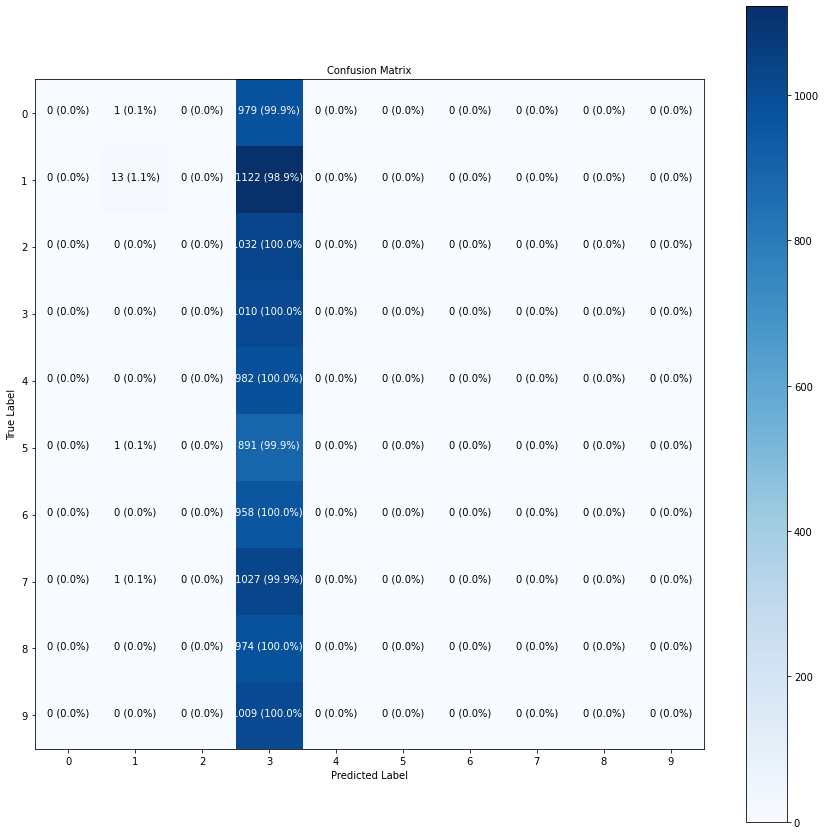

In [12]:
# Test model 1
y_probs_1 = model_1.predict(x_test)
y_preds_1 = y_probs_1.argmax(axis=1)
#y_test[:10], y_preds_1[:10]
plot_confusion_matrix(y_test, y_preds_1, figsize=(15,15), text_size=10)

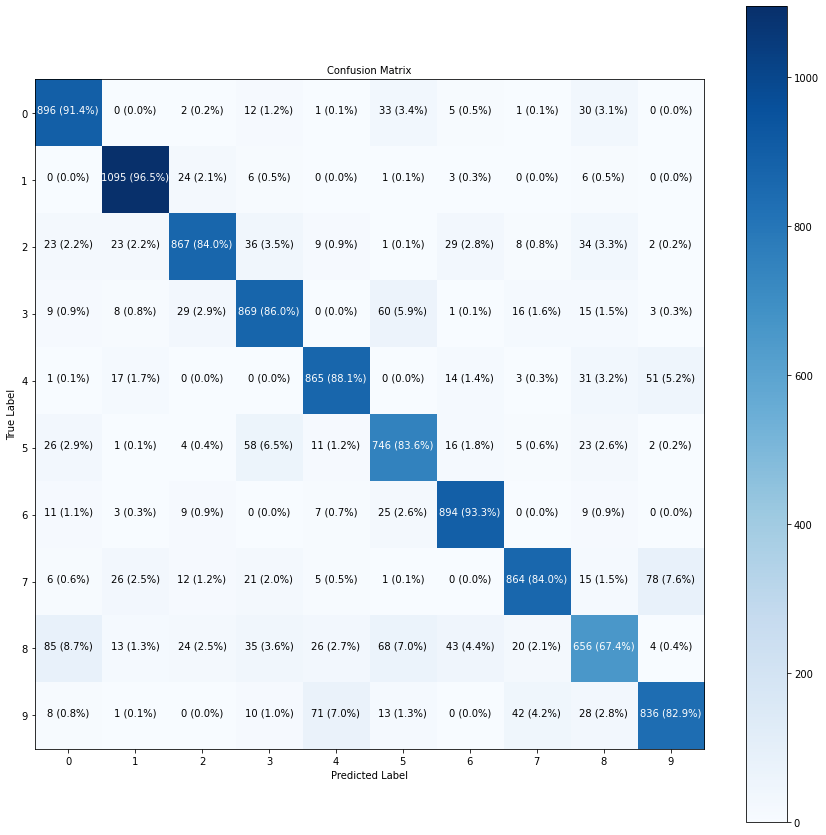

In [13]:
# Test model 2
y_probs_2 = model_2.predict(x_test)
y_preds_2 = y_probs_2.argmax(axis=1)
#y_test[:10], y_preds_2[:10]
plot_confusion_matrix(y_test, y_preds_2, figsize=(15,15), text_size=10)

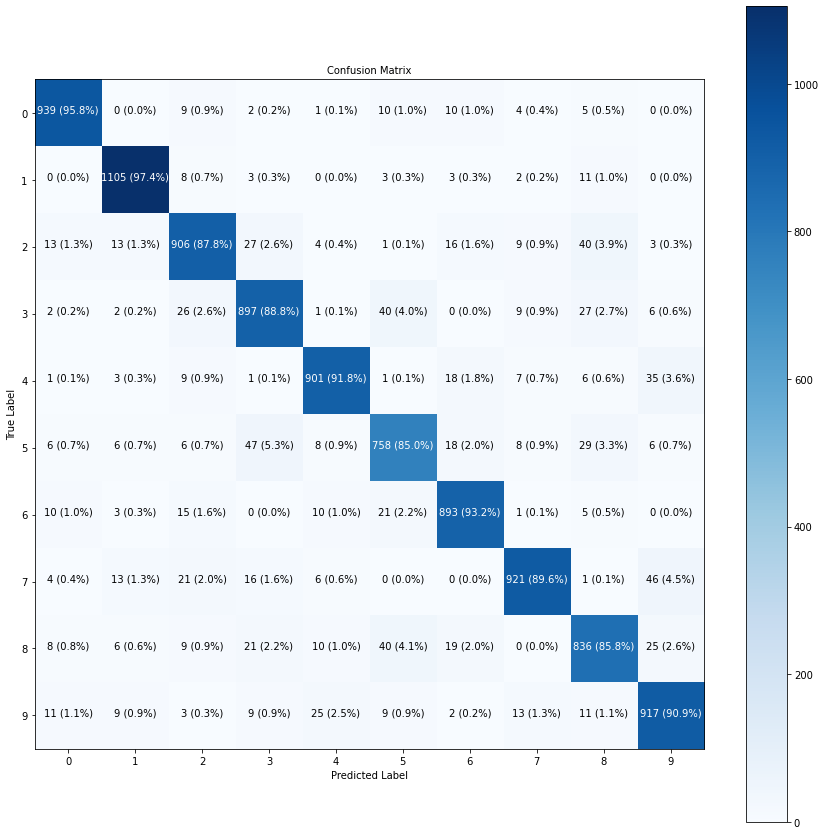

In [14]:
# Test model 3
y_probs_3 = model_3.predict(x_test)
y_preds_3 = y_probs_3.argmax(axis=1)
#y_test[:10], y_preds_3[:10]
plot_confusion_matrix(y_test, y_preds_3, figsize=(15,15), text_size=10)

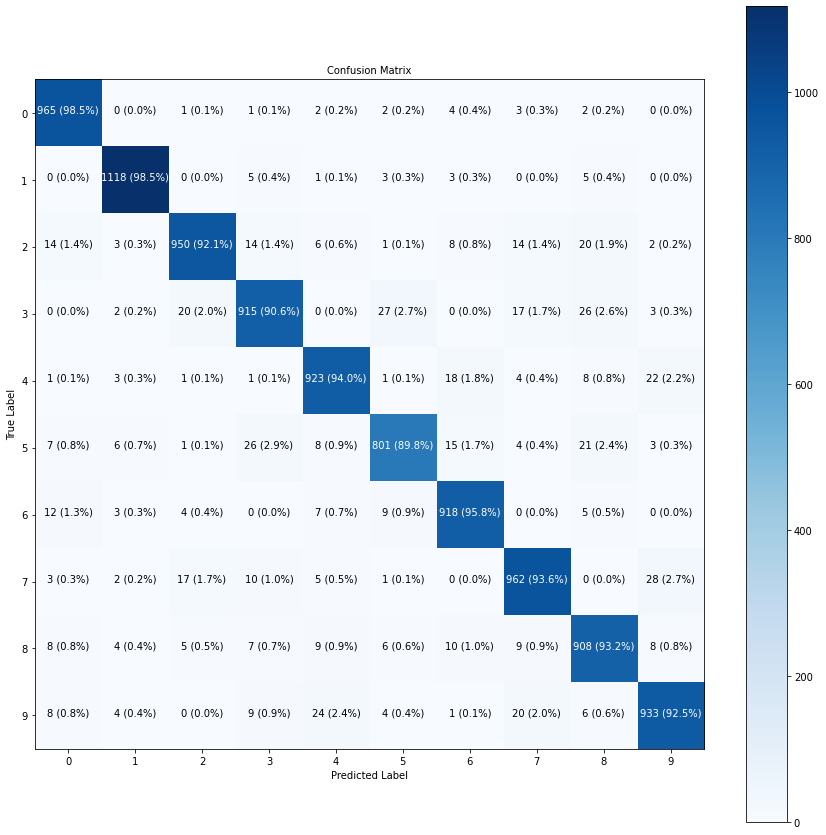

In [15]:
# Test model 4
y_probs_4 = model_4.predict(x_test)
y_preds_4 = y_probs_4.argmax(axis=1)
#y_test[:10], y_preds_4[:10]
plot_confusion_matrix(y_test, y_preds_4, figsize=(15,15), text_size=10)

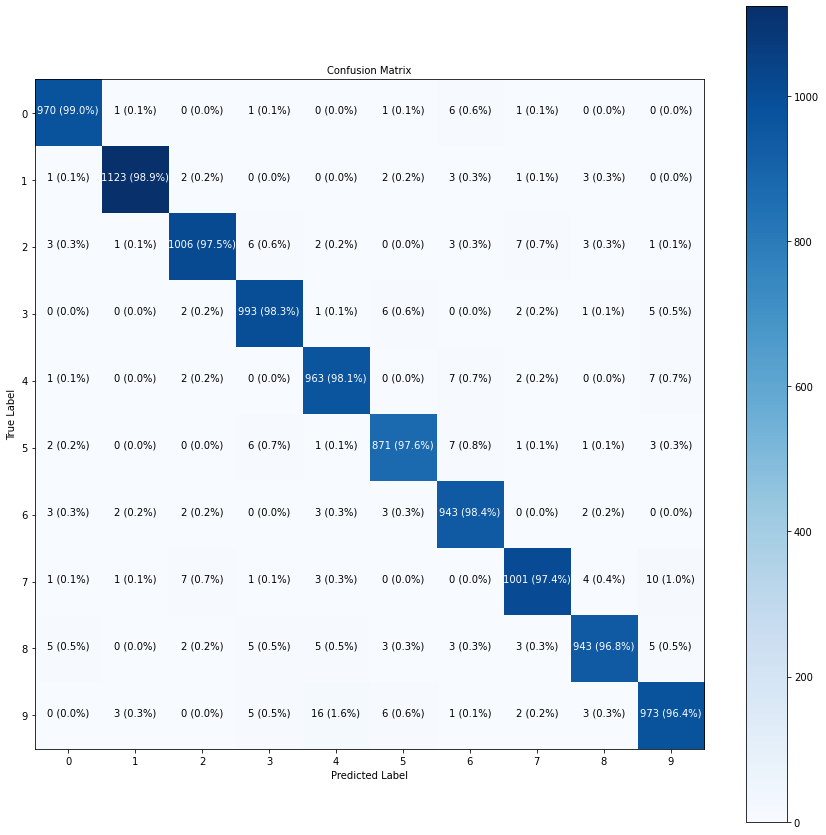

In [16]:
# Test model 5
y_probs_5 = model_5.predict(x_test)
y_preds_5 = y_probs_5.argmax(axis=1)
#y_test[:10], y_preds_5[:10]
plot_confusion_matrix(y_test, y_preds_5, figsize=(15,15), text_size=10)

<AxesSubplot:title={'center':'Model_3: Raw Integer data'}>

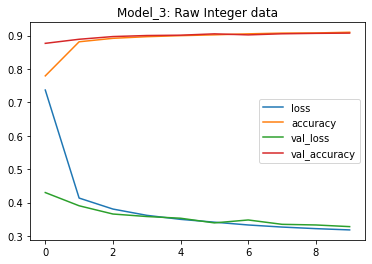

In [17]:
pd.DataFrame(history_3.history).plot(title="Model_3: Raw Integer data")